<a href="https://colab.research.google.com/github/Robprogram2002/PageRank_implementacion_Python/blob/main/PageRank_algoritmo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importamos las librerias necesarias

import numpy as np  # librería para trabjar con matrices y vectores
import networkx as nx  # librería para crear y usar grafos 
import pandas as pd   # librería para organizar datos

In [ ]:
def getRank(tr_mat,N, treshold):
  """
  Calula el estado estacionario de la matrix de transición recibida partiendo de
  una distribución uniforme.

  Parametros
    tr_mat: Matriz de transición de tamaño NxN
    N: número de distintos estados (nodos)
    treshold: distancia minima entre un paso y el siguiente, condición para 
    detener el proceso
  
  Returms
    Una lista con los valores del estado estacionario de la matriz de transición
  """
  # Se crea la distribución inicial uniforme
  pi_0 = np.array([1/N for i in range(N)])
  # se registra la última distribución calculada 
  pi_last = pi_0
  # se calcula la distribución del instante posterior al inicial
  pi_next = np.matmul(pi_0, tr_mat)

  # de forma iterativa se calcula la distribución para instantes posteriores
  # y se detiene el proceso cuando se considere que la convergencia ha ocurrido
  while np.linalg.norm(pi_next-pi_last) > treshold:
    pi_last = pi_next
    pi_next = np.matmul(pi_last, tr_mat)
  
  # Se devuelve la distribución invariante
  return pi_next

def pageRank(links, graph = None, threshold = 0.1, alpha = 0.15): 
  """
  Parametros
    links: lista de tuplas con las relaciones entre las paginas
    treshold: distancia minima entre un paso y el siguiente, condición para 
    detener el algoritmo
    alpha: 

  Returns
    Un diccionario con tres objetos: las paginas ordenadas según su ranking, 
    la matriz de transición y el grafo construido a partir de las relaciones 
    entre las paginas
  """
  
  # Si se recibe una lista con las relaciones entonces se crea un grafo con ella
  if graph is None:
    G = nx.DiGraph()
    G.add_edges_from(links)
  # si se recive el grafo ya creado, entonces solo se asigna a la variable G
  else:
    G = graph
  
  # almacenamos una lista con todos los estados 
  nodes = list(G.nodes)
  N = len(nodes)
  # luego se crea una matriz de N*N donde cada entrada es igual a 0
  P = np.zeros((N,N))

  # se itera sobre cada nodo en el grafo y se obtiene una lista con los 
  # elementos relacionados. Con esta información se actualiza el valor de 
  # cada entrada en la matriz P 
  for i in range(N):
    nbrs = list(G.neighbors(nodes[i]))
    n = len(nbrs)
    for j in range(N):
      if nodes[j] in nbrs:
        P[i][j] = 1 / n
      else:
        P[i][j] = 0

  # se modifica la matriz de transición P para que la cadena de Markov asociada
  # sea aperiodica e irreducible
  P = (1-alpha)*P + (alpha / N)*np.ones((N,N))
   
  # se calcula la distribución invariante 
  stationary = getRank(P, N, threshold)

  # fianlmente se devuelve un diccionario con la información creada por el algoritmo
  return {
      # lista con los estados ordenados según su importancia de forma descendiente
      'ranking': pd.Series(stationary, index = nodes).sort_values(ascending=False),
      # matriz de transición usada para obtener la distribución invariante
      'matrix': pd.DataFrame(P, nodes, nodes),
      # grafo construido a partir de las relaciones entre las paginas
      'graph': G
  }

Ejemplo 1

In [ ]:
edges = [('PageA', 'PageD'), ('PageD', 'PageB'), ('PageC', 'PageA'), ('PageB', 'PageC') ,('PageC', 'PageB') , ('PageC', 'PageD')]
result1 = pageRank(edges, alpha=0)
result1['ranking']

PageB    0.342593
PageC    0.333333
PageD    0.231481
PageA    0.092593
dtype: float64

In [ ]:
result1['matrix']

,PageA,PageD,PageB,PageC
PageA,0.000000,1.000000,0.000000,0.0
PageD,0.000000,0.000000,1.000000,0.0
PageB,0.000000,0.000000,0.000000,1.0
PageC,0.333333,0.333333,0.333333,0.0


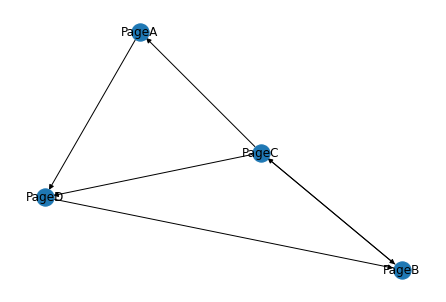

In [ ]:
nx.draw(result1['graph'], with_labels= True)

Example 2

In [ ]:
edges2 = [('PageA', 'PageB'), ('PageA', 'PageD'), ('PageB', 'PageC'), ('PageC', 'PageB'), ('PageC', 'PageA'), ('PageC', 'PageD'), ('PageD', 'PageC')]
result2 = pageRank(edges2, 0.001, 0)
result2['matrix']

,PageA,PageB,PageD,PageC
PageA,0.000000,0.500000,0.500000,0.0
PageB,0.000000,0.000000,0.000000,1.0
PageD,0.000000,0.000000,0.000000,1.0
PageC,0.333333,0.333333,0.333333,0.0


In [ ]:
result2['ranking']

PageC    0.428326
PageB    0.214335
PageD    0.214335
PageA    0.143004
dtype: float64

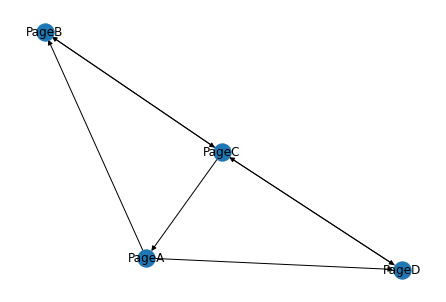

In [ ]:
nx.draw(result2['graph'], with_labels=True)

Example 3

In [ ]:
edges3 = [("PageA", "PageB"), ("PageB", "PageA"), ("PageC", "PageB"), ("PageC", "PageD"), ("PageD", "PageC"), ("PageD", "PageA")]
result3 = pageRank(edges3, 0.01)
result3['matrix']

,PageA,PageB,PageC,PageD
PageA,0.0375,0.8875,0.0375,0.0375
PageB,0.8875,0.0375,0.0375,0.0375
PageC,0.0375,0.4625,0.0375,0.4625
PageD,0.4625,0.0375,0.4625,0.0375


In [ ]:
result3['ranking']

PageA    0.43222
PageB    0.43222
PageC    0.06778
PageD    0.06778
dtype: float64

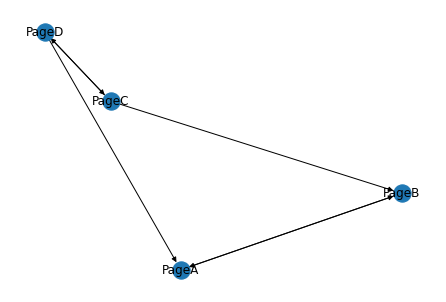

In [ ]:
nx.draw(result3['graph'], with_labels=True)